In [1]:
# %% 
import os
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

# %%


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])
batch_size = 128

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
def __len__(self):
    return len(self.images)

def output_label(label):
    output_mapping = {
                0: "T-shirt/Top",
                1: "Trouser",
                2: "Pullover",
                3: "Dress",
                4: "Coat", 
                5: "Sandal", 
                6: "Shirt",
                7: "Sneaker",
                8: "Bag",
                9: "Ankle Boot"
                }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]


In [5]:
          
class FashionCNN(nn.Module):

    def __init__(self):
        super(FashionCNN, self).__init__()
    
        self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=64, kernel_size=2),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
        
    )
        self.drop1 = nn.Dropout(0.25)
        
        self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2),
        nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.drop2 = nn.Dropout(0.25)
        
        self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2),
        nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.drop3 = nn.Dropout(0.25)
        
        self.layer4 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2),
        nn.BatchNorm2d(64),
            nn.ReLU(),
            
        )
        self.drop4 = nn.Dropout2d(0.25)
        
        self.fc1 = nn.Linear(in_features=64, out_features=10)
        self.soft=nn.Softmax(dim=1)
        self.drop5 = nn.Dropout(0.25)
        #self.fc2 = nn.Linear(in_features=600, out_features=120)
        # self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.drop1(out)
        out = self.layer2(out)
        out = self.drop2(out)
        out = self.layer3(out)
        out = self.drop3(out)
        out = self.layer4(out)
        out = self.drop4(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.soft(out)
        out = self.drop5(out)
        #out = self.fc2(out)
        # out = self.fc3(out)
        
        return out   

In [6]:
# plt.imshow(trainset[0].numpy().squeeze(), cmap='gray_r');  
model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.002
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop1): Dropout(p=0.25, inplace=False)
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop2): Dropout(p=0.25, inplace=False)
  (layer3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop3): Dropout(p=0.25, inplace=False)
  (layer4): Sequential(
    (0): Co

In [7]:
net = model
criterion = error
data_loader = {
    "train": trainloader,
    "val": testloader,
}

dataset_sizes = {
    "train": len(trainset),
    "val": len(testset)
}

In [8]:
def draw_curve(current_epoch, optimizer_name, loss_name, res):
    x_epoch = list(range(current_epoch))
    loss_train = res["loss_train"]
    loss_val = res["loss_val"]
    plt.plot(x_epoch, loss_train, 'bo-', label='train')
    plt.plot(x_epoch, loss_val, 'ro-', label='val')

    if current_epoch == 0:
        plt.legend()
    os.makedirs("loss_graphs", exist_ok=True)
    plt.savefig(os.path.join('./loss_graphs',
                f'train_{optimizer_name}_{loss_name}.jpg'))


def train(epochs=20):
    path = "model"
    state_file_name = f"{path}/state-{net._get_name()}-optimizer-{optimizer.__class__.__name__}-loss-{criterion.__class__.__name__}.pth"
    state_res = {}

    print(state_file_name, end=" ")
    if os.path.exists(state_file_name):
        print("exist")
        state = torch.load(state_file_name)
        net.load_state_dict(state["state_dict"])
        optimizer.load_state_dict(state["optimizer"])
        state_res = state["res"]

    else:
        print("Not exist")
    res = {
        "loss_train": state_res.get("loss_train", []),
        "loss_val": state_res.get("loss_val", []),
        "epoch": state_res.get("epoch", 0),
    }
    res["epoch"]

    # loop over the dataset multiple times
    for epoch in range(res["epoch"]+1, epochs):
        running_loss = 0.0
        phase_loss = 0
        for phase in ["train", "val"]:
            if phase == "train":
                net.train(True)  # Set model to training mode
            else:
                net.train(False)  # Set model to evaluate mode
            for i, data in enumerate(data_loader[phase], 0):
                # get the inputs; data is a list of [inputs, labels]
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)
                now_batch_size = labels.size()[0]
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                if phase == "train":
                    loss.backward()
                    optimizer.step()
                # print statistics
                phase_loss += loss.item() * now_batch_size
                running_loss += loss.item()
                if i % 200 == 199 and phase == "train":
                    print(
                        f'[{epoch}, {i + 1:5d}] loss: {running_loss / 2000:.4f}')
                    running_loss = 0.0
            phase_loss = phase_loss / dataset_sizes[phase]
            # y_loss[phase].append(phase_loss)
            res[f"loss_{phase}"].append(phase_loss)
            res["epoch"] = epoch
        print(
            f"Epoch {epoch} loss: {res['loss_train'][-1]:.8f} val: {res['loss_val'][-1]:.8f}")
        draw_curve(epoch, optimizer_name=optimizer.__class__.__name__,
                   loss_name=criterion.__class__.__name__, res=res)

        state = {
            "epoch": epoch,
            "state_dict": net.state_dict(),
            "optimizer": optimizer.state_dict(),
            "res": res
        }
        torch.save(state, state_file_name)

model/state-FashionCNN-optimizer-Adam-loss-CrossEntropyLoss.pth Not exist
[1,   200] loss: 0.1843
[1,   400] loss: 0.1724
Epoch 1 loss: 1.77296622 val: 1.66359962
[2,   200] loss: 0.1699


KeyboardInterrupt: 

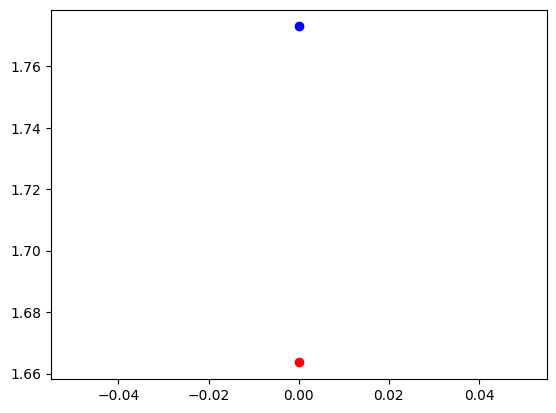

In [9]:
train(7)

In [10]:

y_true = []
y_pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for a, b in zip(labels, predicted):
            # print(a.item(), b.item())
            y_true.append(a.item())
            y_pred.append(b.item())
        # break
        # the class with the highest energy is what we choose as prediction
        # _, predicted = torch.max(outputs.data, 1)
        # total += labels.size(0)
        # correct += (predicted == labels).sum().item()



# %%
print("f1", f1_score(y_true, y_pred, average="macro"))
# %%
print("pre", precision_score(y_true, y_pred, average="macro"))
# %%
print("acc", accuracy_score(y_true, y_pred))
# %%

f1 0.6251775804889689
pre 0.6293084691375496
acc 0.6239
